In [1]:
import pandas as pd
import numpy as np
import os
import re

In [12]:
folder_path = os.getcwd()
dataframes = {}

for root, dirs, files in os.walk(folder_path):
    for file in files:
        if file.endswith(".csv"):
            file_path = os.path.join(root, file)
            df = pd.read_csv(file_path)
            dataframes[file] = df

In [17]:
for key in dataframes.keys():
    df = dataframes[key]
    df = df[df['Motor Speed'] > 500]
    dataframes[key] = df

In [59]:
df.columns

Index(['Time', 'Distance', 'G Force Lat', 'G Force Long', 'Pack DCL',
       'Batt Temp Hi', 'Batt Temp Lo', 'INV_COMMANDTQ', 'Motor Speed',
       'Pack SOC', 'BMS_DCCurrent', 'Pack CCL', 'Session', 'Log Date',
       'Vehicle'],
      dtype='object')

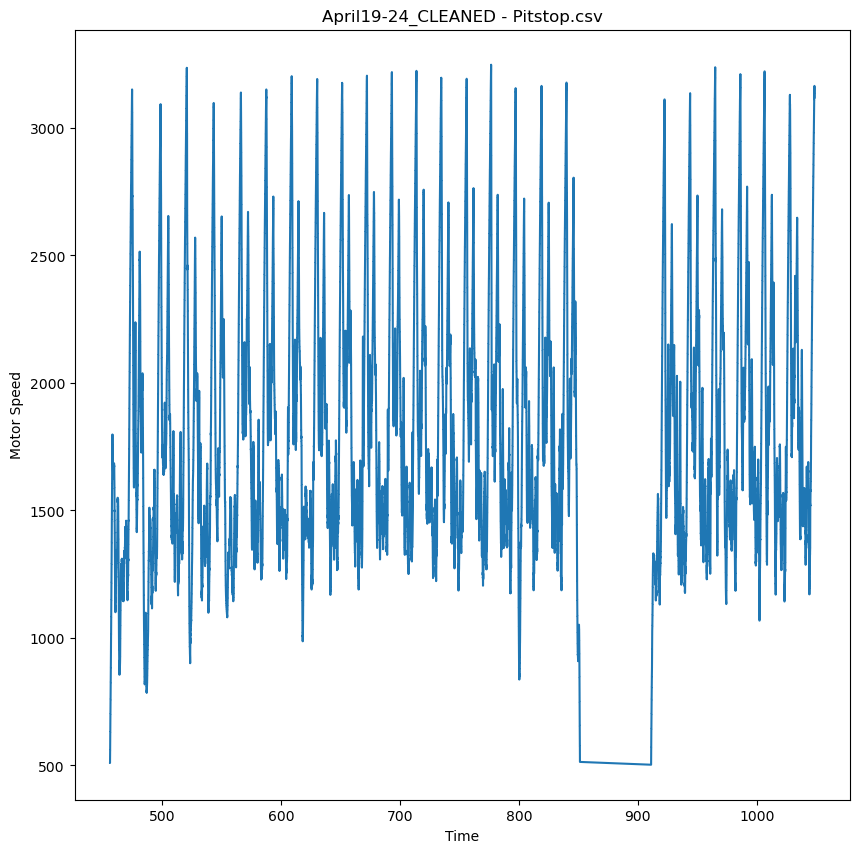

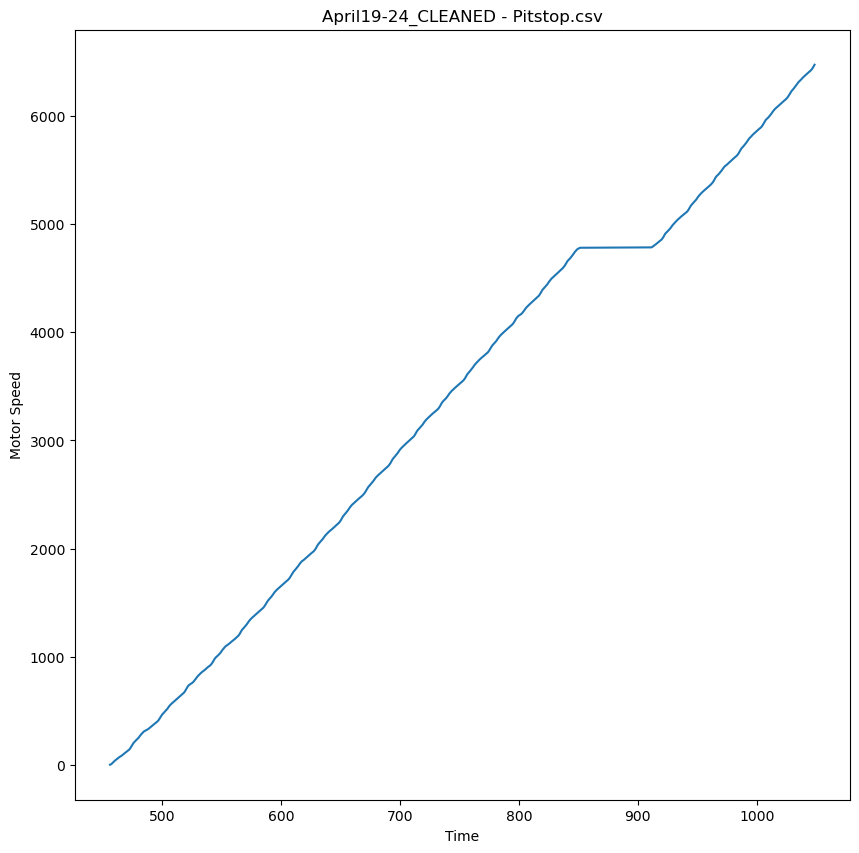

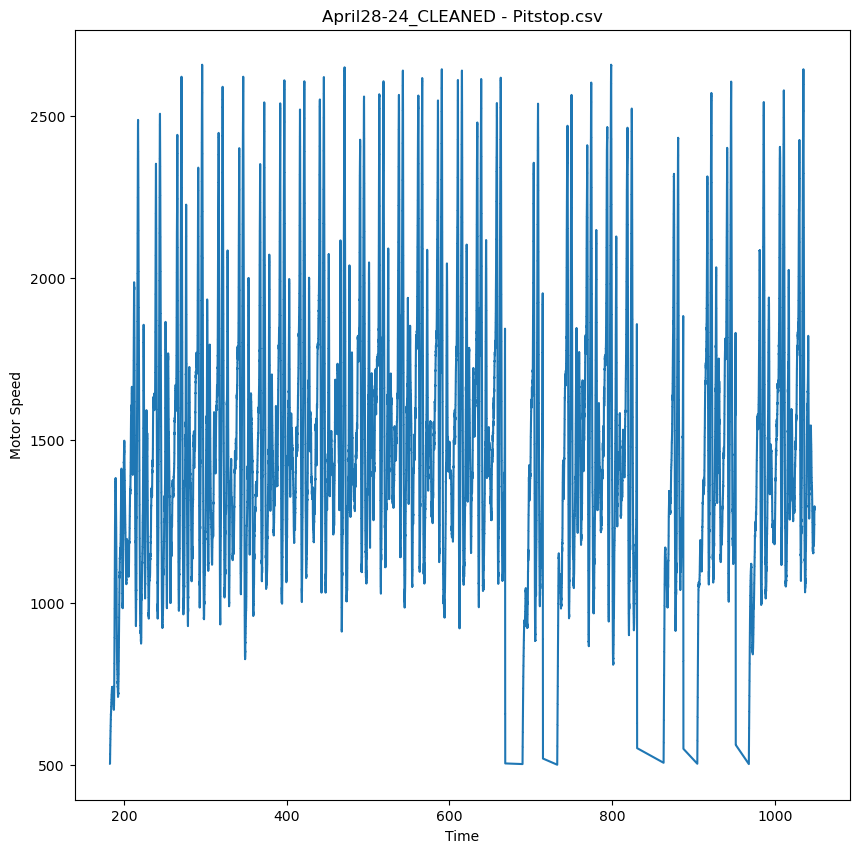

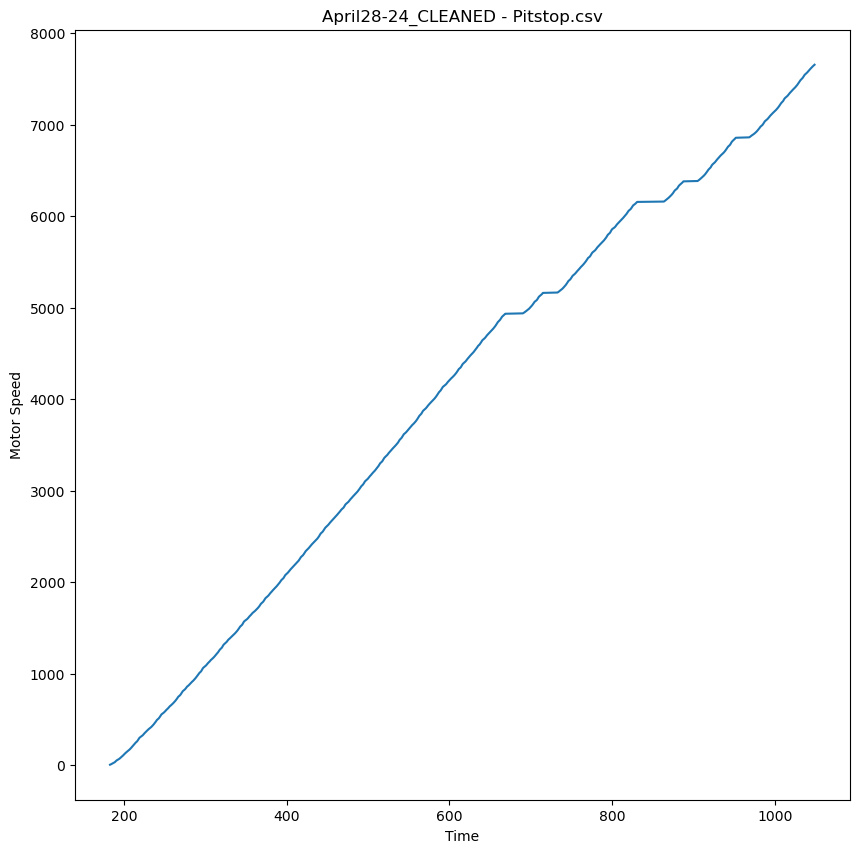

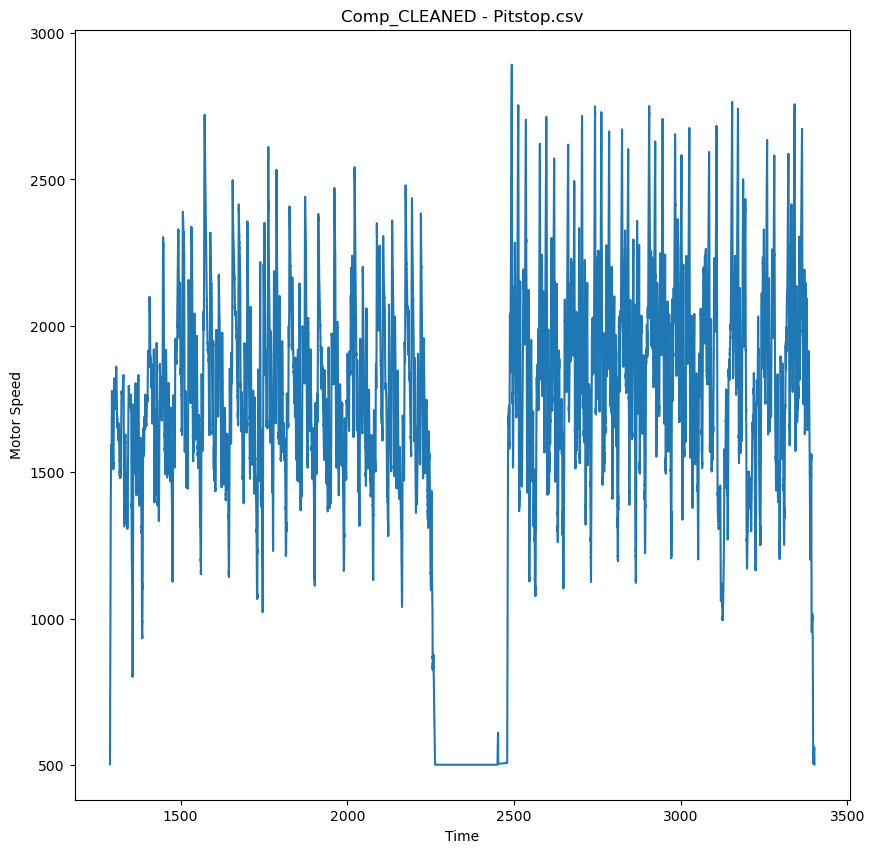

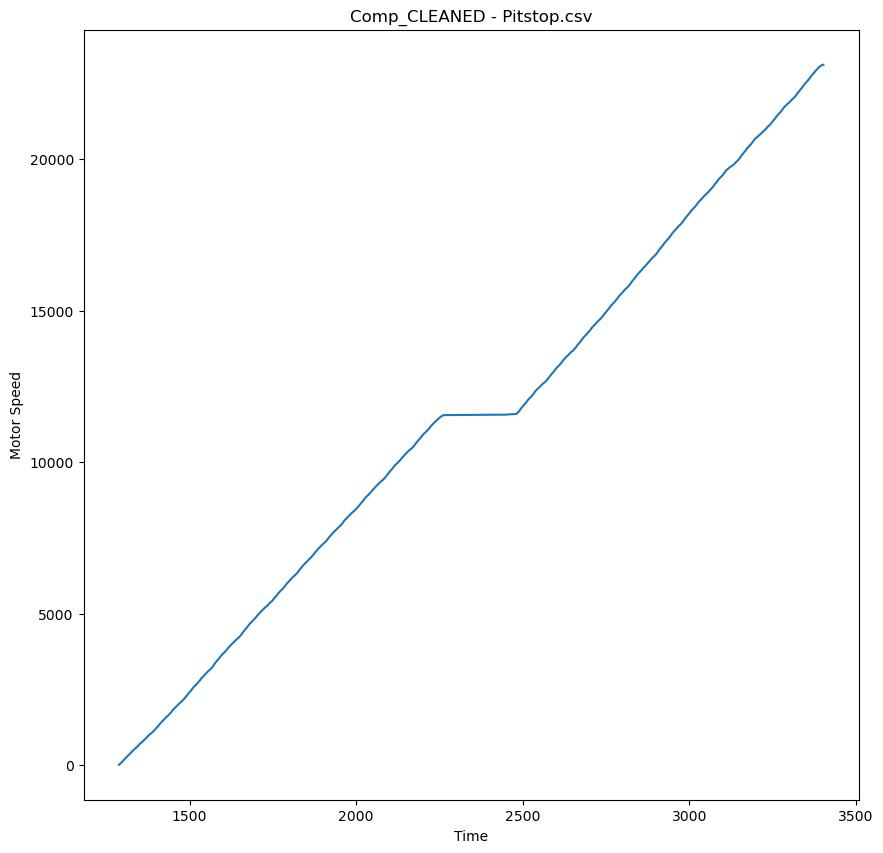

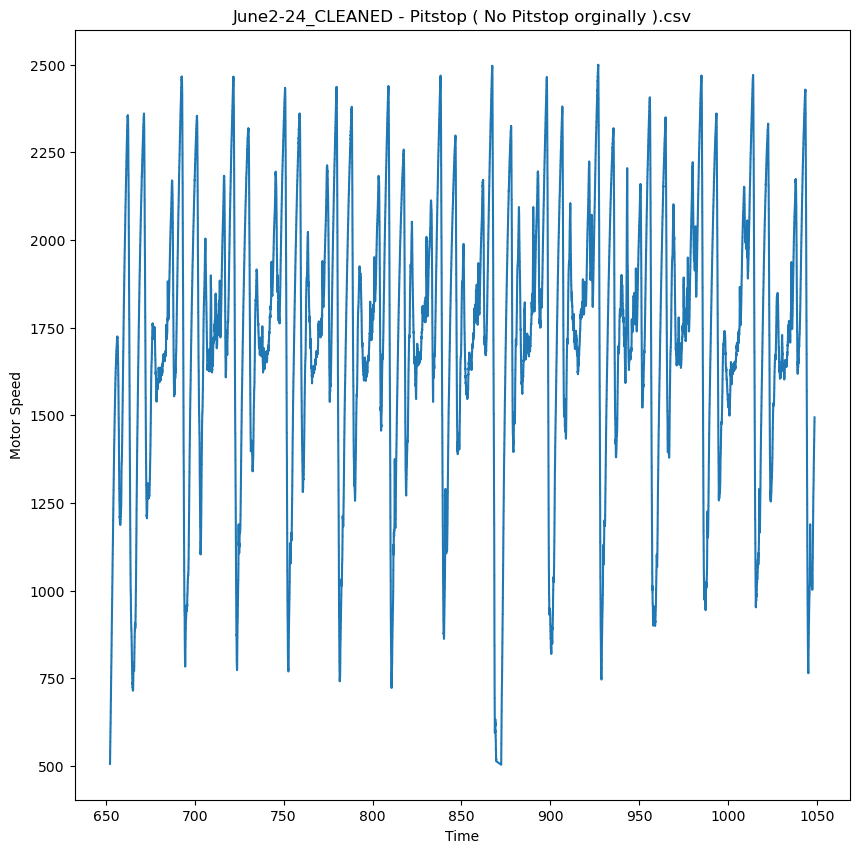

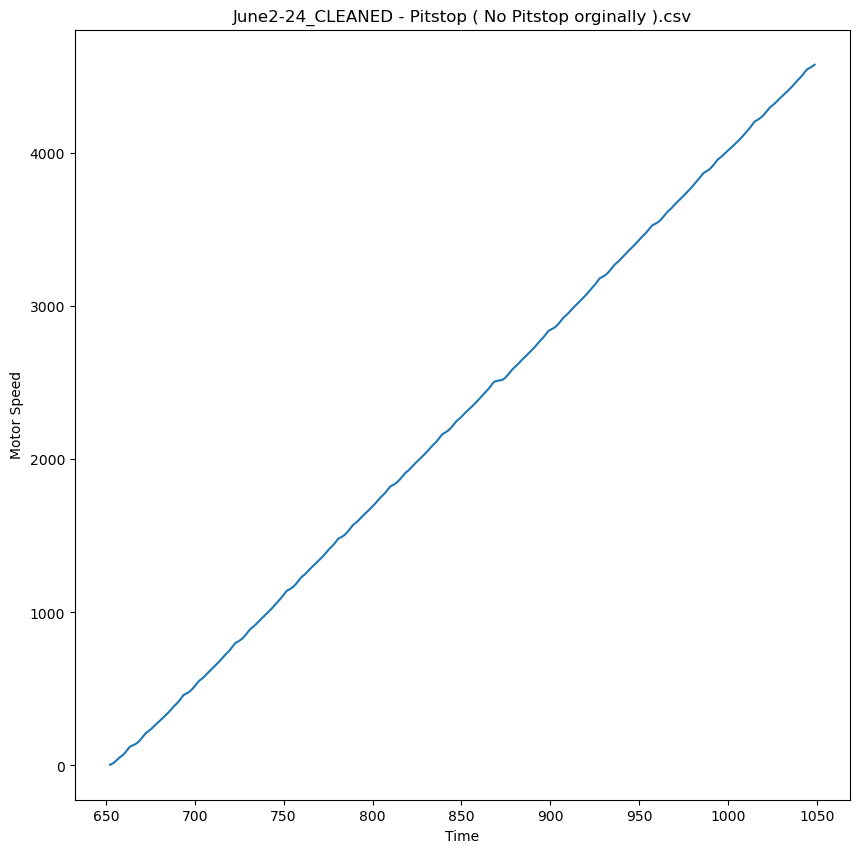

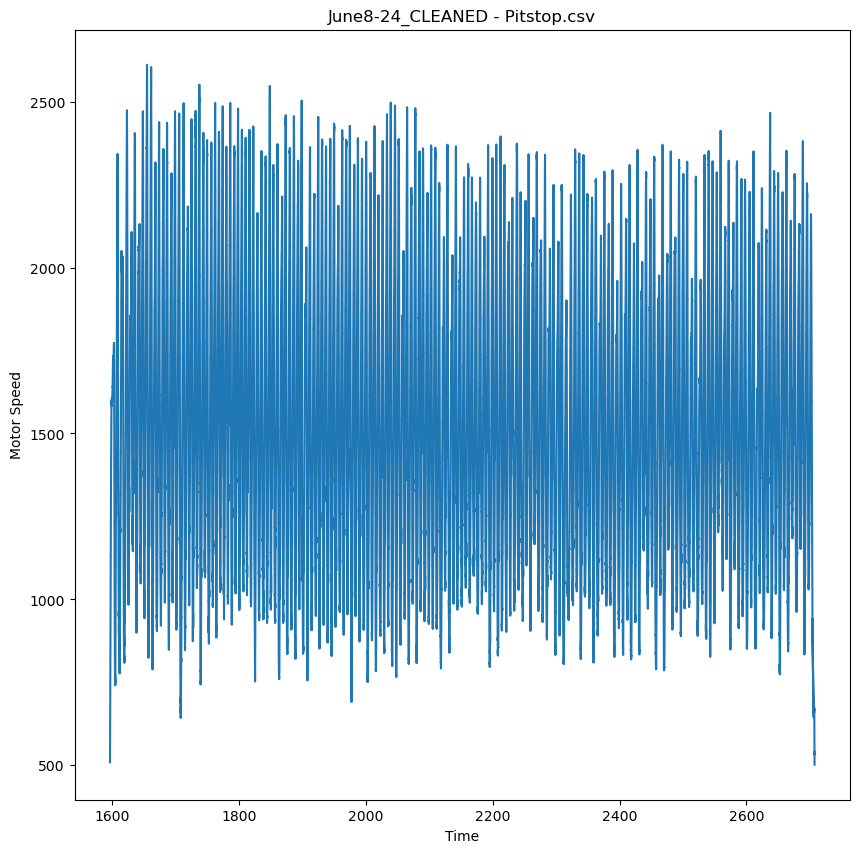

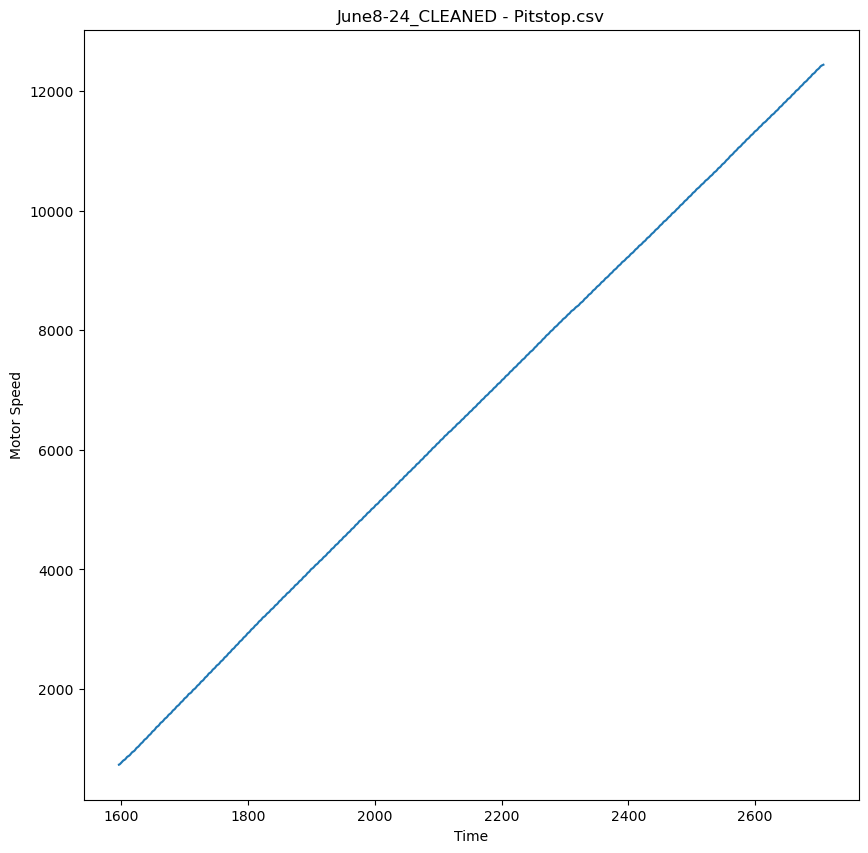

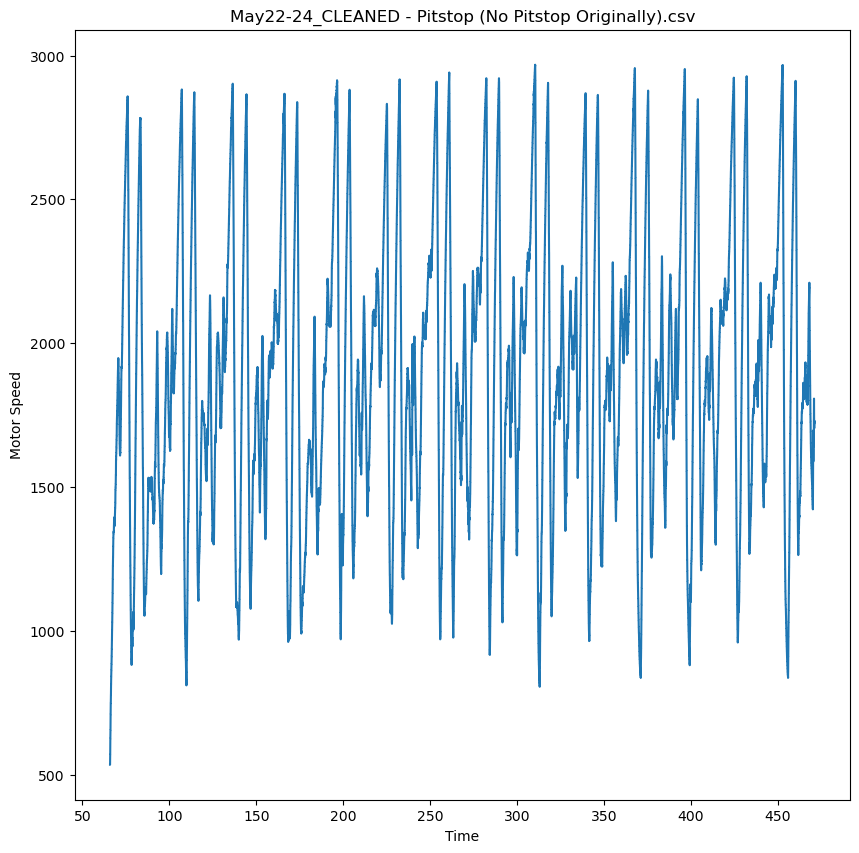

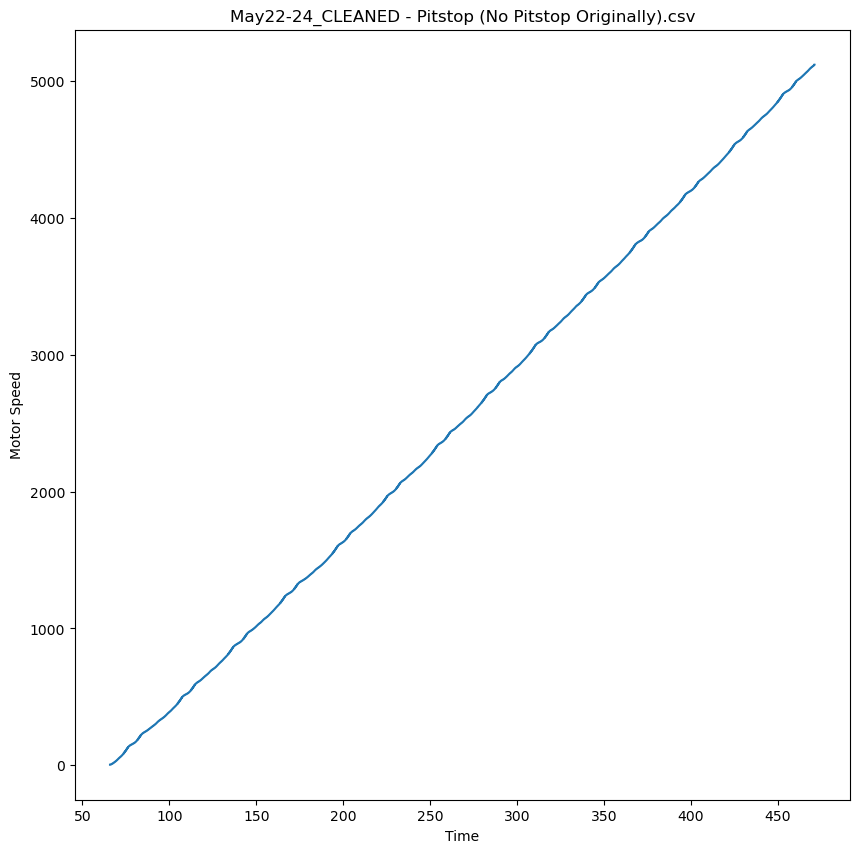

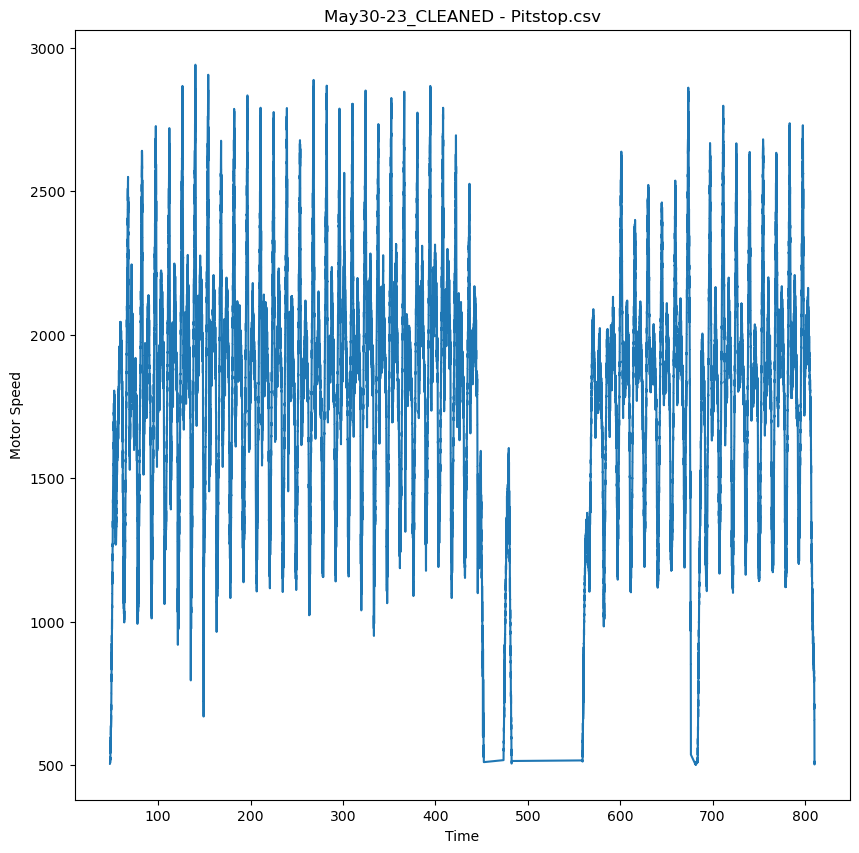

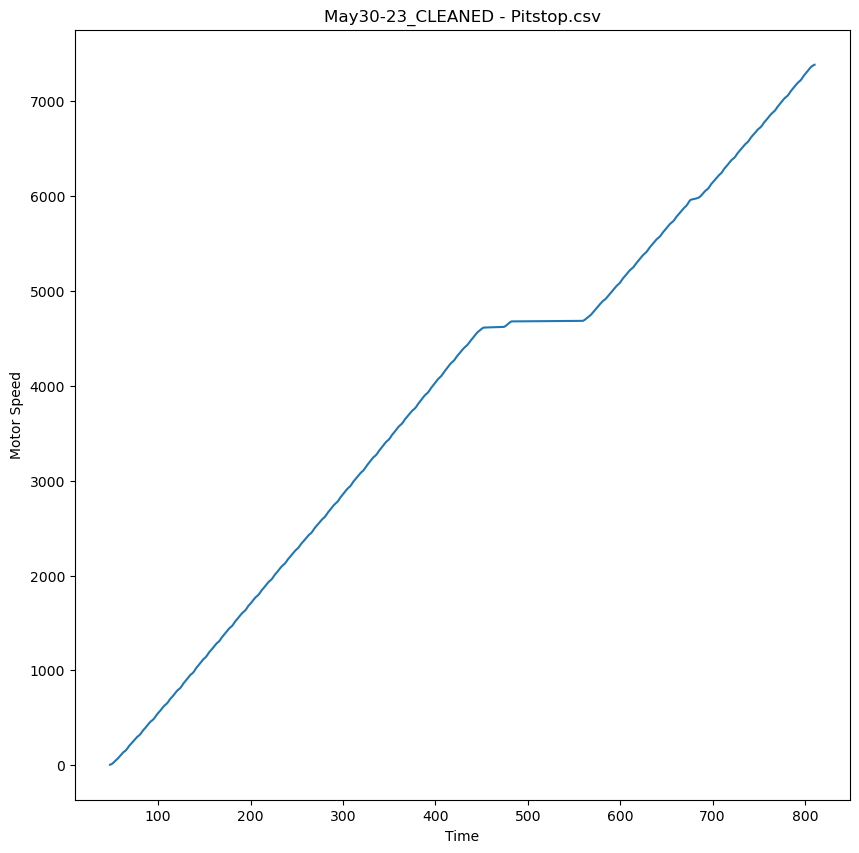

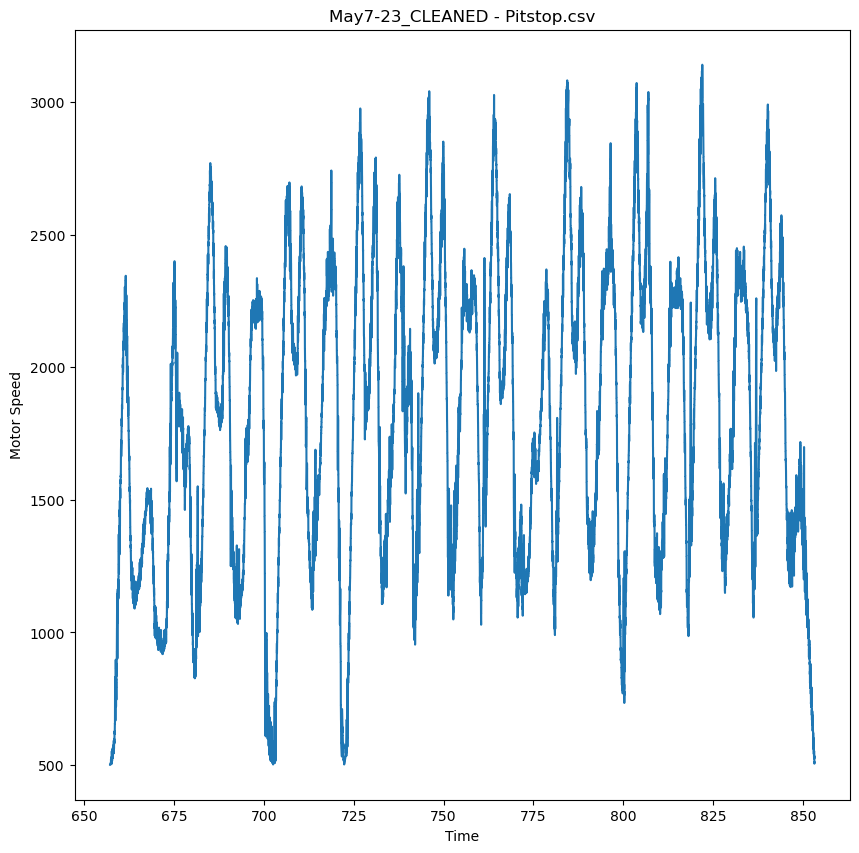

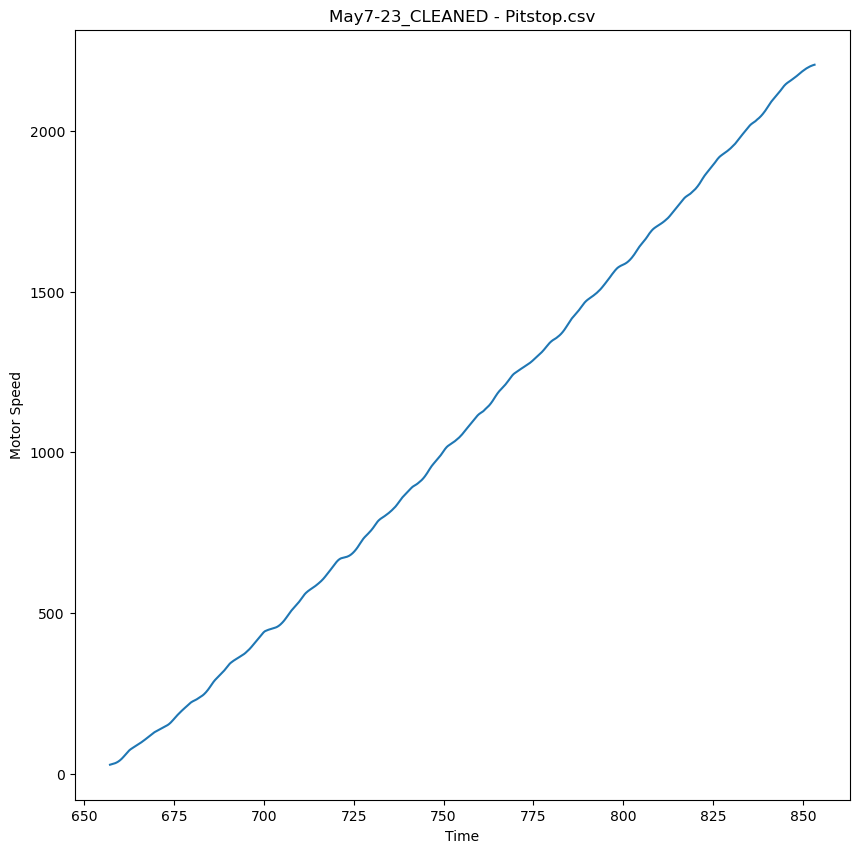

In [24]:
import matplotlib.pyplot as plt
for key in dataframes.keys():
    df = dataframes[key]
    
    # Plot Motor Speed
    plt.figure(figsize=(10,10))
    plt.plot(df['Time'], df['Motor Speed'])
    plt.xlabel('Time')
    plt.ylabel('Motor Speed')
    plt.title(key)
    
    # Plot Distance
    plt.figure(figsize=(10,10))
    plt.plot(df['Time'], df['Distance'])
    plt.xlabel('Time')
    plt.ylabel('Motor Speed')
    plt.title(key)

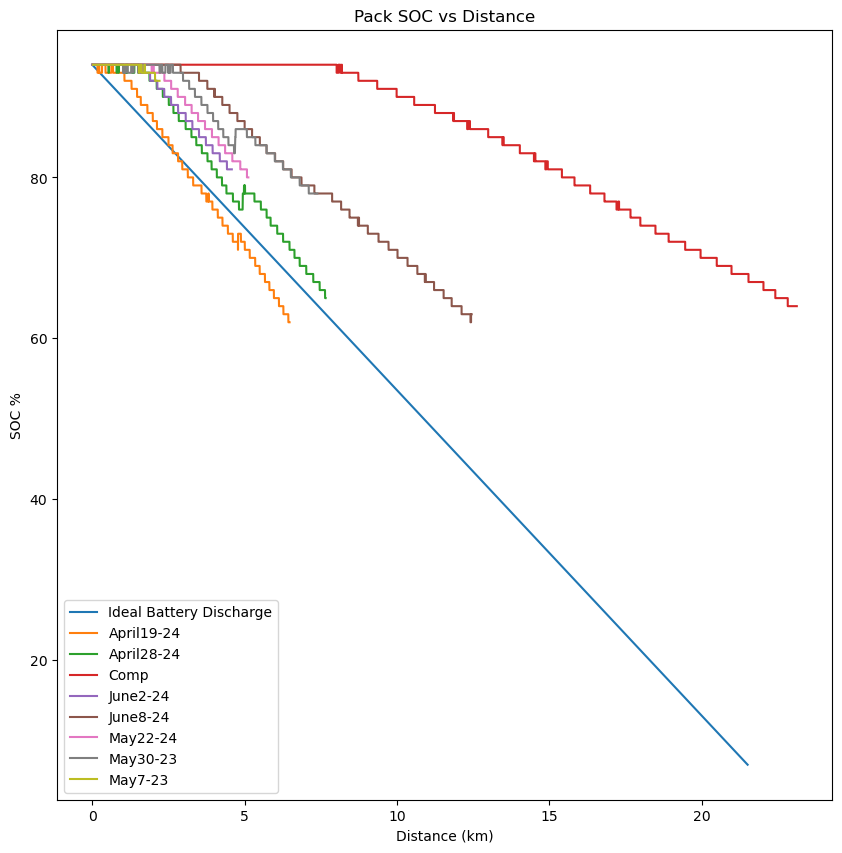

In [47]:
def ideal(x,intercept):
    slope = (intercept-5)/22
    return -1*slope*x+intercept
plt.figure(figsize=(10, 10))
plt.plot(distance,ideal(distance,94),label='Ideal Battery Discharge')

for key in dataframes.keys():
    df = dataframes[key]
    
    # Find the index of the first occurrence of 'i' in the key
    i_pos = key.find('_')
    
    # If 'i' is found, create a title up to the position of 'i'
    if i_pos != -1:
        title = key[:i_pos]  # Get substring up to (but not including) the position of 'i'
    else:
        title = key  # If 'i' is not found, use the entire key as the title
    
    # Plot SOC
    distance = np.arange(0,22,.5)
    plt.plot(df['Distance']/1000, df['Pack SOC'], label=title)
    plt.xlabel('Distance (km)')
    plt.ylabel('SOC %')
    plt.legend(loc='lower left')  # Add a legend to the plot


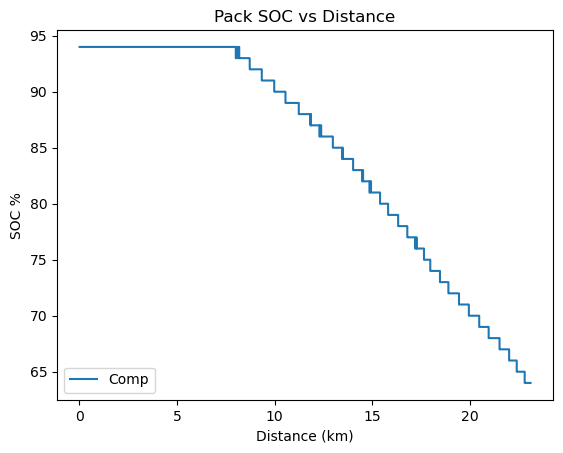

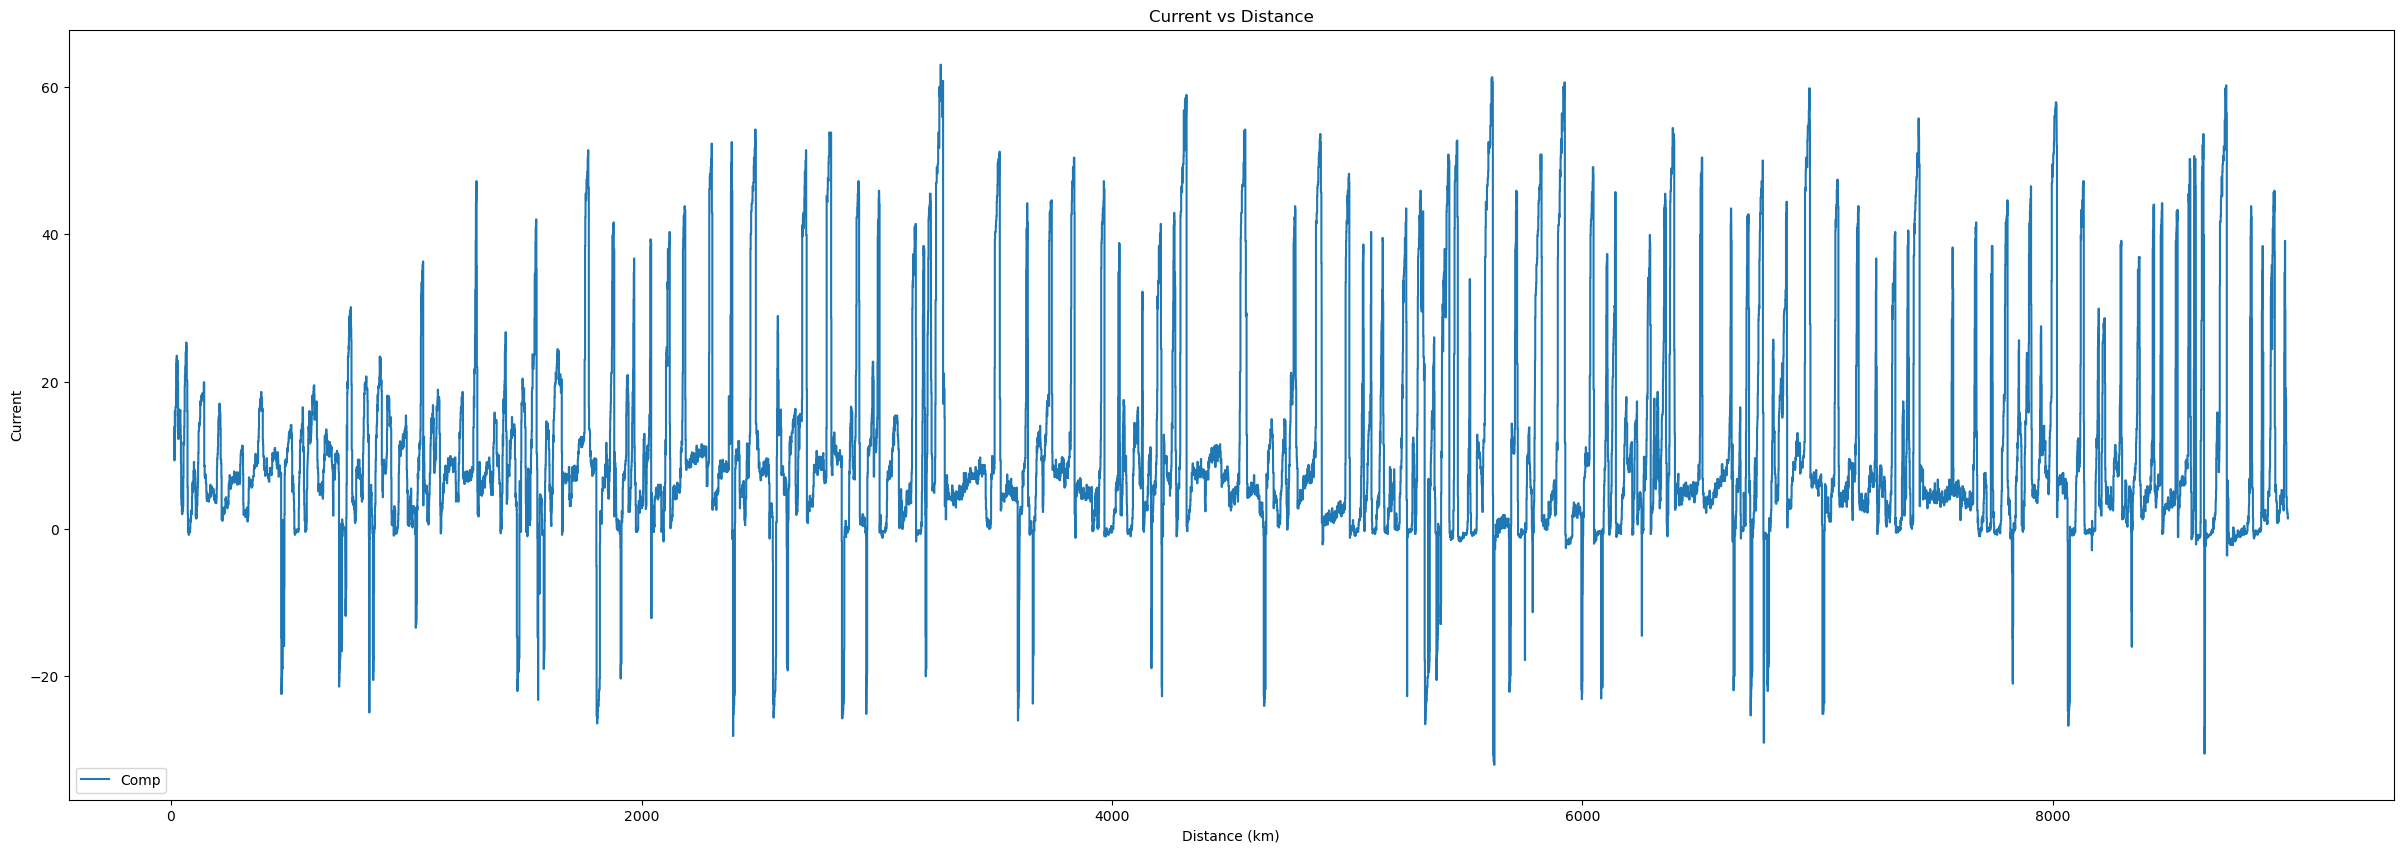

In [58]:

for key in dataframes.keys():
    if key[0] == 'C':
        df = dataframes[key]

        # Find the index of the first occurrence of 'i' in the key
        i_pos = key.find('_')

        # If 'i' is found, create a title up to the position of 'i'
        if i_pos != -1:
            title = key[:i_pos]  # Get substring up to (but not including) the position of 'i'
        else:
            title = key  # If 'i' is not found, use the entire key as the title

        # Plot SOC
        distance = np.arange(0,22,.5)
        plt.plot(df['Distance']/1000, df['Pack SOC'], label=title)
        plt.xlabel('Distance (km)')
        plt.ylabel('SOC %')
        plt.title('Pack SOC vs Distance')
        plt.legend(loc='lower left')  # Add a legend to the plot
        plt.show()
        
        distance = df['Distance'][df['Distance']/1000<9]
        current = df['BMS_DCCurrent'][df['Distance']/1000<9]
        
        # Plot current
        plt.figure(figsize=(30, 10))
        plt.plot(distance, current, label=title)
        plt.xlabel('Distance (km)')
        plt.ylabel('Current')
        plt.title('Current vs Distance')
        plt.legend(loc='lower left')  # Add a legend to the plot
        plt.show()



In [ ]:
def save_cleaned_dataframes(dataframes):
    for file_path, df in dataframes.items():
        # Get the directory and original filename
        directory, filename = os.path.split(file_path)
        name, ext = os.path.splitext(filename)
        
        # Create new filename with "_CLEANED" appended
        new_filename = f"{name}_CLEANED{ext}.csv"
        new_file_path = os.path.join(directory, new_filename)
        
        # Save the DataFrame to the new file path
        df.to_csv(new_file_path, index=False)
        print(f"Saved cleaned DataFrame to: {new_file_path}")